# Informe TP1

# Ejercicio 1
    Implementar un Generador Congruencial Lineal (GCL) de m√≥dulo 2^32, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los n√∫meros de padr√≥n de los integrantes del grupo.

In [1]:
from scipy.stats import chi2
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set()

In [2]:
multiplicador = 1013904223
incremento = 1664525
modulo = pow(2,32)

semilla = ((102140 + 102361 + 102216 + 98316) / 4 ) - 0.25

anterior_a = semilla
def gcl_a():
    global anterior_a
    anterior_a = (multiplicador *  anterior_a + incremento) % modulo
    return anterior_a

for i in range(1, 10):
    v = gcl_a()
    print(v)

3312200771.0
2852875264.0
1507490304.0
637185024.0
4049811968.0
2952391680.0
4040948224.0
2617846784.0
2219096576.0


* Modificar el GCL implementado en el punto a) para que devuelva n√∫meros al azar entre 0 y 1

In [3]:
cota = 4294967295
def gcl_b():
    return gcl_a() / cota

anterior_a = semilla
for i in range(1, 10):
    v = gcl_b()
    print(v)

0.7711818376023281
0.664236784135978
0.35098993786400884
0.14835619929906824
0.9429203274061252
0.687407255332779
0.9408565761849416
0.6095149518478464
0.5166736842404757


* Realizar los gr√°ficos que considere necesarios para mostrar las distribuciones de n√∫meros al azar generados en los puntos a) y b)

<Figure size 660x440 with 0 Axes>

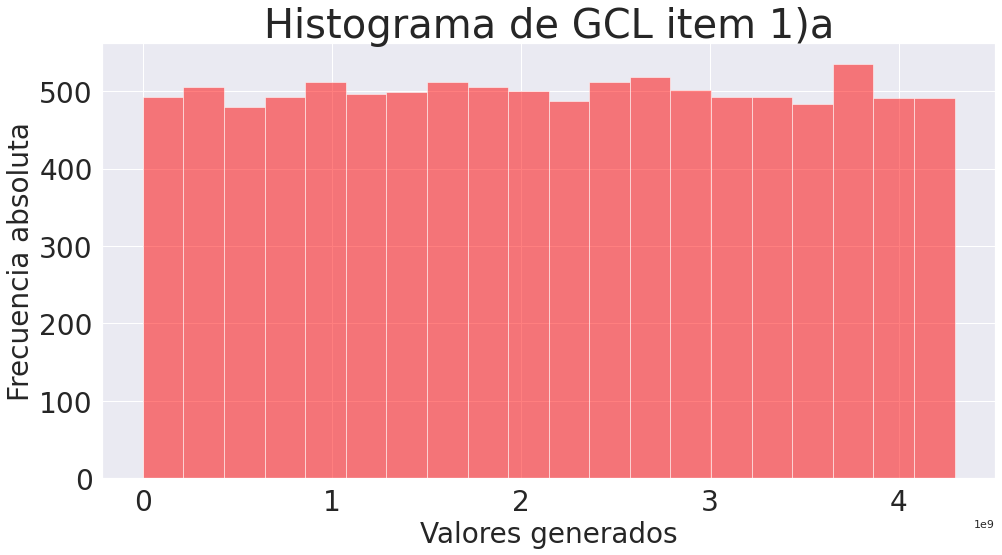

In [4]:
plt.figure( dpi=110)

m=10000
nros_a=[]
nros_b=[]
v= semilla

for i in range(0,m):
    v = gcl_a()
    nros_a.append(v)

num_bins = 20
plt.figure(figsize=[16,8])
plt.hist(nros_a, num_bins, facecolor="red", alpha=0.5)
plt.xlabel('Valores generados', fontsize=28)
plt.ylabel('Frecuencia absoluta', fontsize=28)
plt.title(r'Histograma de GCL item 1)a', fontsize=40)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

<Figure size 660x440 with 0 Axes>

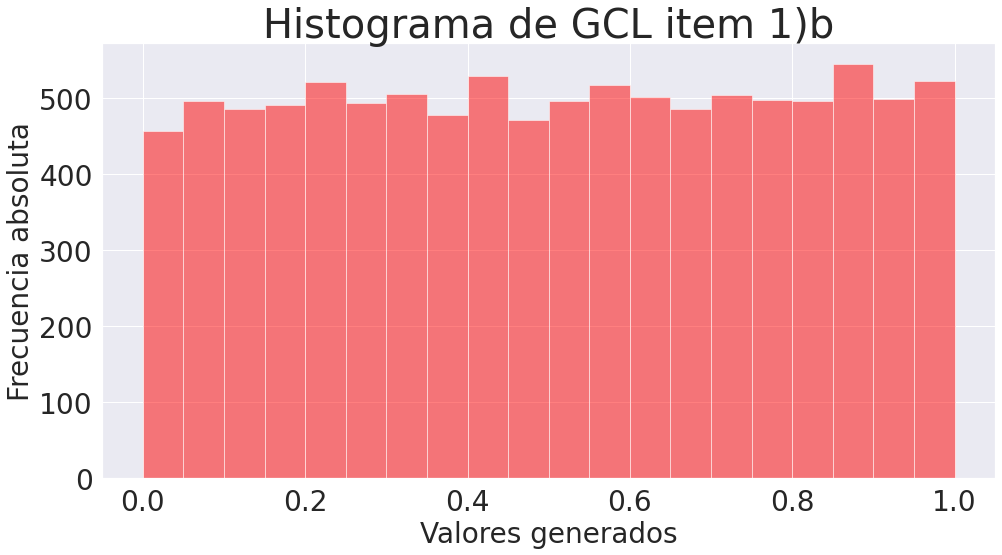

In [5]:
plt.figure( dpi=110)
m=10000
nros_b=[]
v = semilla

for i in range(0,m):
    v = gcl_b()
    nros_b.append(v)
    
num_bins = 20
plt.figure(figsize=[16,8])
plt.hist(nros_b, num_bins, facecolor="red", alpha=0.5)
plt.xlabel('Valores generados', fontsize=28)
plt.ylabel('Frecuencia absoluta', fontsize=28)
plt.title(r'Histograma de GCL item 1)b', fontsize=40)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

* Bas√°ndose en el generador implementado en el √≠tem a, implemente el generador aditivo propuesto por Mitchell y Moore ùë•ùëñ+1 = ( ùë•ùëñ‚àí24 + ùë•ùëñ‚àí55) ùëöùëúùëë 2 24
    Donde ùë•0,ùë•1, ‚Ä¶ , ùë•54 son n√∫meros arbitrarios no todos iguales.

In [6]:
array = []
def inicializar_Mitchell_Moore():
    m=55
    global array
    global anterior_a
    anterior_a = semilla
    for i in range(0,m):
        v = gcl_a()
        array.append(v)
        
def agregacion_por_Mitchell_Moore():
    global array
    v = (array[len(array) - 32] + array[len(array) - 55]) % pow(2, 24)
    array.append(v)
    return v

inicializar_Mitchell_Moore()
for i in range(1, 10):
    print(agregacion_por_Mitchell_Moore())

3102787.0
5645824.0
3991040.0
1975808.0
7661056.0
15083008.0
11331072.0
11412992.0
15001088.0


<Figure size 660x440 with 0 Axes>

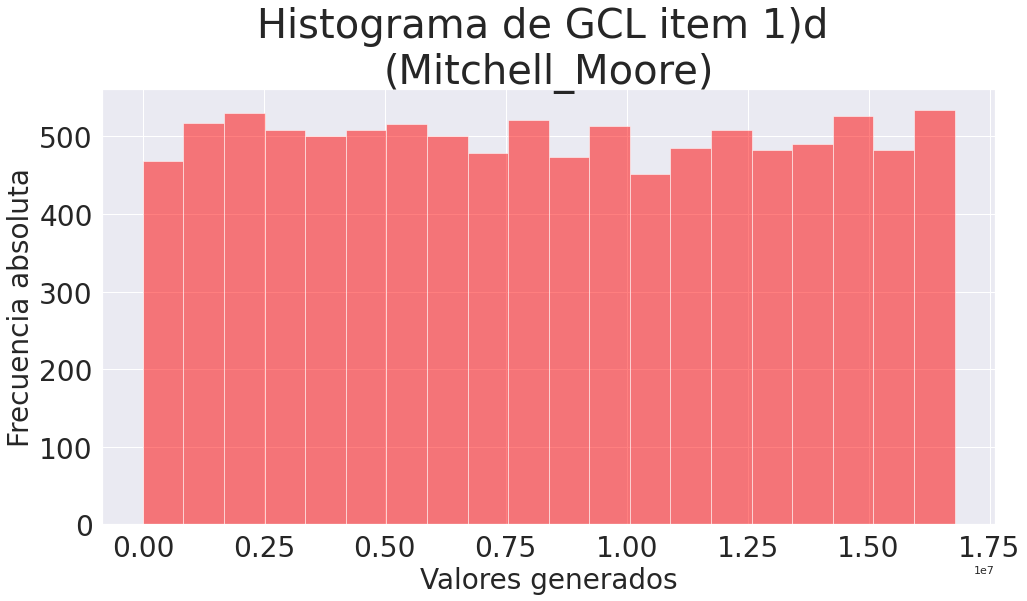

In [7]:
plt.figure( dpi=110)
m=10000
nros_b=[]

inicializar_Mitchell_Moore()
for i in range(0,m):
    v = agregacion_por_Mitchell_Moore()
    nros_b.append(v)
    
num_bins = 20
plt.figure(figsize=[16,8])
plt.hist(nros_b, num_bins, facecolor="red", alpha=0.5)
plt.xlabel('Valores generados', fontsize=28)
plt.ylabel('Frecuencia absoluta', fontsize=28)
plt.title('Histograma de GCL item 1)d \n(Mitchell_Moore)', fontsize=40)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

# Ejercicio 2

    Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento. 
    Evaluar e interpretar los resultados de cada uno para distintos tama√±os de muestras.

* Comenzaremos testeando el generador gcl del item 1)a de numeros entre 0 y 4294967295, y en base a los resultados se sacaran conclusiones para el generador del item 1)a y 1)b, ya que en la implementaci√≥n del generador del item 1)b se retornan los mismos resultados que el generador a divididos por el numero maximo que este ultimo puede generar; adem√°s, para los siguientes test se requirio utilizar numeros entre cero y uno, y los numeros generador por a se terminan dividiendo por el valor maximo para la realizacion de los test y por ende testear a y b es identico.

In [8]:
# Test de Chi Cuadrado para el algoritmo de gcl

m=1000
cota = 4294967295
k = 10
Np = (1/(k))*m

N = []
anterior_a=semilla
for i in range(1, m):
    N.append(gcl_a())

intervalos = []
frecuencias_absolutas = []
for Ni in N:
    intervalos.append(int((Ni/cota) * k +1))
for i in range(1,k+1):
    frecuencias_absolutas.append(intervalos.count(i))

d_cuadrado = 0
for Ni in frecuencias_absolutas:
    d_cuadrado += (pow((Ni - Np), 2) / Np)
    
limite_superior = chi2.ppf((0.95), df=9)

if d_cuadrado > limite_superior:
    print("La distribucion no es uniforme, (se puede rechazar H0)")
else:
    print("La distribucion parece ser uniforme, (no se puede rechazar H0)")


La distribucion parece ser uniforme, (no se puede rechazar H0)


In [9]:
# Test de Kolmogorov-Smirnov para el algoritmo de gcl normalizado

m = 10000
N = []
anterior_a=semilla
for i in range(1, m):
    N.append(gcl_b())
result = stats.kstest(N, 'uniform')

if result.pvalue > 0.05:
    print("La distribucion parece ser uniforme, (no se puede rechazar H0)")
else:
    print("La distribucion no es uniforme, (se puede rechazar H0)")

La distribucion parece ser uniforme, (no se puede rechazar H0)


* Dado que para ambos test se concluye que la distribucion parece ser uniforme, esto nos da una mayor certeza de que efectivamente lo es.

In [10]:
# Test de Chi Cuadrado para el algoritmo de Mitchell Moore

m=1000
cota = 4294967295
k = 10
Np = (1/(k))*m

N = []
inicializar_Mitchell_Moore()
for i in range(1, m):
    N.append(agregacion_por_Mitchell_Moore())

intervalos = []
frecuencias_absolutas = []
for Ni in N:
    intervalos.append(int((Ni/(pow(2, 24) -1)) * k +1))
for i in range(1,k+1):
    frecuencias_absolutas.append(intervalos.count(i))

d_cuadrado = 0
for Ni in frecuencias_absolutas:
    d_cuadrado += (pow((Ni - Np), 2) / Np)
    
limite_superior = chi2.ppf((0.95), df=9)
if d_cuadrado > limite_superior:
    print("La distribucion no es uniforme (se puede rechazar H0)")
else:
    print("La distribucion parece ser uniforme, (no se puede rechazar H0)")

La distribucion no es uniforme (se puede rechazar H0)


In [11]:
# Test de Kolmogorov-Smirnov para el algortimo de Mitchell Moore

m = 1000
N = []

inicializar_Mitchell_Moore()
for i in range(1, m):
    N.append(agregacion_por_Mitchell_Moore()/(pow(2, 24) - 1))
result = stats.kstest(N, 'uniform')

if result.pvalue > 0.05:
    print("La distribucion parece ser uniforme, (no se puede rechazar H0)")
else:
    print("La distribucion no es uniforme (se puede rechazar H0)")

La distribucion parece ser uniforme, (no se puede rechazar H0)


* Dado que los test muestran resultados contradictorios seria necesario realizar mas test para sacar una conclusion fuerte sobre la distribuci√≥n de los n√∫meros generados.

# Ejercicio 3

    Se desea generar puntos al azar con distribuci√≥n uniforme dentro del √°rea descripta en el gr√°fico utilizando los siguientes
    generadores de n√∫meros al azar:
    
    a) Generadores de n√∫meros al azar con distribuci√≥n uniforme, provistos por el lenguaje elegido para resolver el tp
    
    b) Alguno de los generadores de n√∫meros al azar implementados con el algoritmo del ejercicio 1.
    
    c) Calcule el factor de rendimiento del m√©todo.

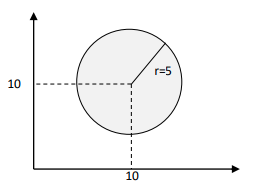

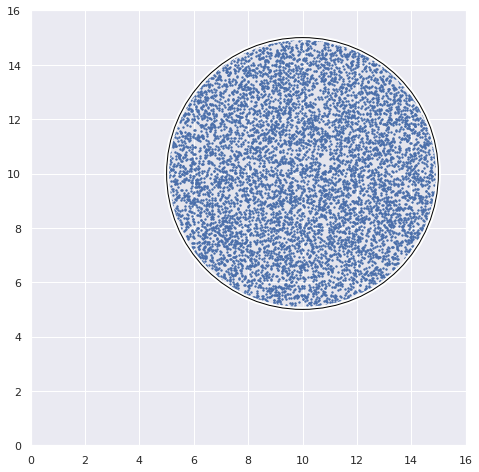

In [12]:
import numpy as np
x_result = []
y_result = []
for i in range(1, 10000):    
    x = np.random.uniform(low=5, high=15)
    y = np.random.uniform(low=5, high=15)
    if pow(x-10, 2)+pow(y-10,2)<=25:
        x_result.append(x)
        y_result.append(y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)
    
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

circle = Circle(
    (10, 10),
    radius=5,
    clip_on=False,
    zorder=10,
    linewidth=1,
    edgecolor='black',
    facecolor=(0, 0, 0, 0.0125),
    path_effects=[withStroke(linewidth=5, foreground='w')],
)
ax.add_artist(circle)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_ylim(ymax=16)
ax.set_xlim(xmax=16)
plt.scatter(x_result, y_result, s = 2)
plt.show()


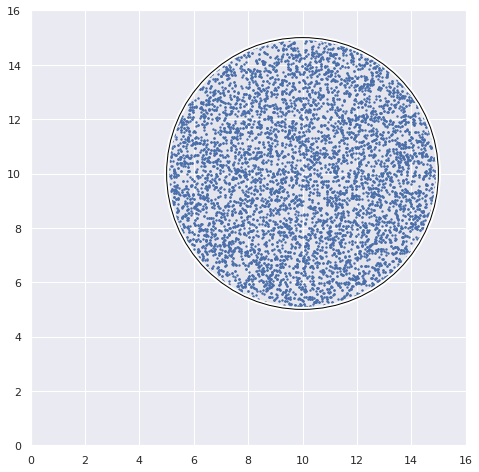

In [13]:
x_result = []
y_result = []
anterior_a = semilla
for i in range(1, 10000):    
    x = (gcl_b()*10)+5
    y = (gcl_b()*10)+5
    if pow(x-10, 2)+pow(y-10,2)<=25:
        x_result.append(x)
        y_result.append(y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)
    
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

circle = Circle(
    (10, 10),
    radius=5,
    clip_on=False,
    zorder=10,
    linewidth=1,
    edgecolor='black',
    facecolor=(0, 0, 0, 0.0125),
    path_effects=[withStroke(linewidth=5, foreground='w')],
)
ax.add_artist(circle)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_ylim(ymax=16)
ax.set_xlim(xmax=16)
plt.scatter(x_result, y_result, s = 2)
plt.show()


* Asumiendo que las variables x e y siguen una distribucion uniforme y que son independientes entre ellas, entonces el factor de rendimiento del metodo se calcula como:
    
    factor =  area del circulo / area posible = 0.7853
    
    donde el area posible es el area delimitada por el cuadrado de lados de largo 10 en los intervalos x entre 5 y 15 e y entre 5 y 15

# Ejercicio 4

    Para la siguiente densidad de probabilidad, se pide:

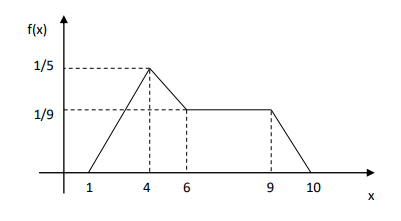

* Definir la funci√≥n de densidad de probabilidad.

La funcion de densidad de probabilidad es: 
    f(x) =  0                 si 0 <= x < 1
            (1/15 x - 1/15)   si 1 <= x < 4
            (-2/45 x + 17/45) si 4 <= x < 6
            1/9               si 6 <  x < 9
            (-1/9 x + 10/9)   si 9 <  x < 10

* Calcular y graficar la funci√≥n de probabilidad acumulada y su inversa.

F(x) = 
        
        0                       si x < 1

        x¬≤/30 - x/15 + 1/30     si 1 < x < 4

        -x¬≤/45 + 17x/45 - 77/90 si 4 < x < 6

        x/9 - 1/18              si 6 < x < 9

        -x¬≤/18 + 10x/9 -41/9    si 9 < x < 10

        1                       si 10 < x

---------------------

x = F‚Åª¬π(u) = 
            
        1+sqrt(30 * u)                      si 0     < u < 3/10 
        -3*sqrt(-5 * (-4*u - 3)) / 2 + 17/2 si 3/10  < u < 11/18 
        (u+1/18) * 9                        si 11/18 < u < 17/18
        -3 * sqrt(-2 * (u-1)) + 10          si 17/18 < u < 1

* Utilizando el generador de n√∫meros aleatorios implementado en el √≠tem b del ejercicio 1, genere n√∫meros al azar
con la distribuci√≥n propuesta.

In [14]:
def inversa(u):
    if 0 < u <= (3/10):
        return 1 + math.sqrt(30 * u)
    elif (3/10) < u < (11/18):
        return -3*(math.sqrt(-5 * (4*u - 3))) / 2 + 17/2
    elif (11/18) < u <= (17/18):
        return (u+1/18) * 9
    elif (17/18) < u < 1:
        return -3 * math.sqrt(-2 * (u-1)) + 10
    else:
        return 50 
nros = []

for i in range(1, 10000):
    nros.append(inversa(np.random.uniform(low=0, high=1.0)))

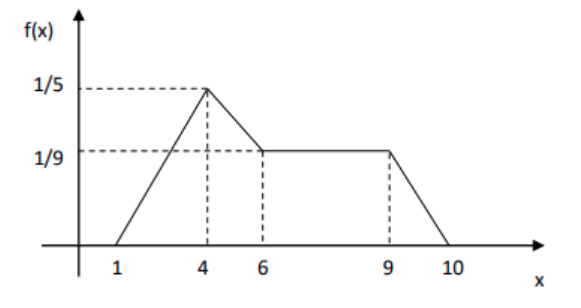

* Realice los gr√°ficos que considere necesarios para mostrar la distribuci√≥n de n√∫meros al azar generados.

<AxesSubplot:ylabel='Density'>

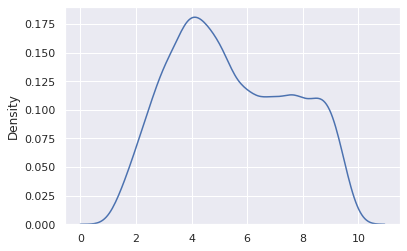

In [15]:
sns.kdeplot(nros)

# Ejercicio 5
Implemente un m√©todo para generar variables aleatorias con distribuci√≥n normal con media 15 y desv√≠o 3.
Muestre gr√°ficamente la distribuci√≥n que siguen los n√∫meros pseudoaleatorios generados.
Realice 2 tests de los explicados en la materia para verificar si los n√∫meros generados siguen la distribuci√≥n pedida (evalu√© los
resultados para distintos tama√±os de muestra).

In [16]:
def arreglo_de_normales(N):
    U1=np.random.rand(N)
    U2=np.random.rand(N)
    S=np.random.rand(N)
    X=[]
    X11=[]
    def f1(u):
        return -1*np.log(U1[i])
    def f2(x):
        return np.exp(-1/2 * (x-1)**2 )
    for i in range (N):
        X1=f1(U1[i])
        if(U2[i] <=f2(X1)):
            if S[i] <= 0.5:
                X.append((X1*3)+ 15 )
            else:
                X.append((-1*X1)*3+15)
    return X

In [17]:
from scipy import stats
def shaphiro(X):
    print("\nresultados del test de shaphiro: \n\n")
    shapiro_test = stats.shapiro(X)
    if shapiro_test.pvalue < 0.05:
        print("rechazamos Ho, la distribuci√≥n no es normal")
    else:
        print("no hay evidencia suficiente para asegurar que la distribucion no es normal")

In [18]:
def anderson(X):
    print("\nresultados del test de anderson: \n\n")
    anderson_test = stats.anderson(X)

    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < anderson_test.critical_values[i]:
            print('Nivel de significancia: %.3f:  valor critico: %.3f, la distribucion parece ser normal (no se puede rechazar H0)' % (sl, cv))
        else:
            print('Nivel de significancia: %.3f: valor critico: %.3f, la distribucion no es normal (se rechaza H0)' % (sl, cv))

A continuaci√≥n se generan 10, 100 y 1000 n√∫meros y se realizan los test de Anderson y Shaphire para comprobar si los resultados se corresponden con los de distribuciones normales con media 15 y desvio 3


resultados del test de shaphiro: 


no hay evidencia suficiente para asegurar que la distribucion no es normal

resultados del test de anderson: 


Nivel de significancia: 15.000:  valor critico: 0.592, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 10.000:  valor critico: 0.675, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 5.000:  valor critico: 0.809, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 2.500:  valor critico: 0.944, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 1.000:  valor critico: 1.123, la distribucion parece ser normal (no se puede rechazar H0)


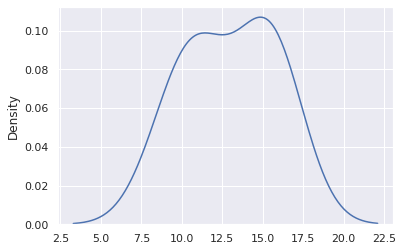

In [19]:
N=10
x = arreglo_de_normales(N)
sns.kdeplot(x)
shaphiro(x)
anderson(x)


resultados del test de shaphiro: 


no hay evidencia suficiente para asegurar que la distribucion no es normal

resultados del test de anderson: 


Nivel de significancia: 15.000:  valor critico: 0.549, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 10.000:  valor critico: 0.625, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 5.000:  valor critico: 0.750, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 2.500:  valor critico: 0.875, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 1.000:  valor critico: 1.041, la distribucion parece ser normal (no se puede rechazar H0)


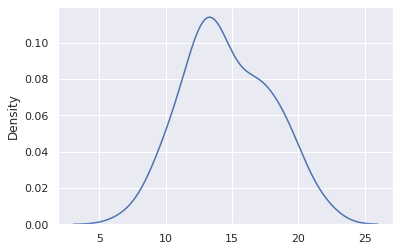

In [20]:
N=100
x = arreglo_de_normales(N)
sns.kdeplot(x)
shaphiro(x)
anderson(x)


resultados del test de shaphiro: 


no hay evidencia suficiente para asegurar que la distribucion no es normal

resultados del test de anderson: 


Nivel de significancia: 15.000:  valor critico: 0.573, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 10.000:  valor critico: 0.653, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 5.000:  valor critico: 0.783, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 2.500:  valor critico: 0.913, la distribucion parece ser normal (no se puede rechazar H0)
Nivel de significancia: 1.000:  valor critico: 1.086, la distribucion parece ser normal (no se puede rechazar H0)


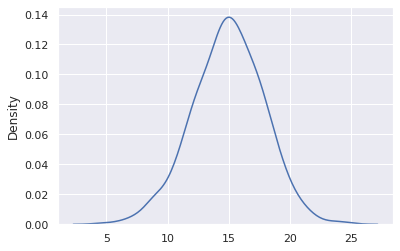

In [27]:
N=1000
x = arreglo_de_normales(N)
sns.kdeplot(x)
shaphiro(x)
anderson(x)


### Ejercicio 6

Se nos proporcion√≥ un archivo con 100000 n√∫meros generados aleatoriamente. Debemos determinar y justificar a cu√°l de las siguientes distribuciones pertenecen los n√∫meros suministrados:

1. Uniforme de par√°metros a=25 y b=35
2. Exponencial de media 30
3. Normal de media 30 y desv√≠o est√°ndar 5

In [22]:
import scipy.stats as st

Primero abrimos el archivo y guardamos todos los elementos en un arreglo.

In [23]:
with open("random_numbers.txt", "r") as archivo:
    numeros_random = np.array([float(linea) for linea in archivo if len(linea)>1])

In [24]:
numeros_random

array([25.017, 26.154, 28.827, ..., 23.825, 29.344, 24.904])

Vamos a calcular diferentes medidas de nuestra muestra:

In [25]:
print("Cantidad de elementos: %d" % len(numeros_random))
print("Valor m√≠nimo: %.3f - Valor m√°ximo: %.3f" % (np.amin(numeros_random), np.amax(numeros_random)))
print("Media: %.3f - Desv√≠o Est√°ndar: %.3f" % (np.mean(numeros_random), np.std(numeros_random)))

Cantidad de elementos: 100000
Valor m√≠nimo: 8.056 - Valor m√°ximo: 51.166
Media: 30.023 - Desv√≠o Est√°ndar: 4.989


Con este peque√±o an√°lisis ya podemos descalificar la distribuci√≥n uniforme porque tenemos valores que est√°n fuera del rango [25, 30].
Vemos que los valores de media y desv√≠o est√°ndar coinciden con los de la distribuci√≥n normal pero esto no basta para afirmar que esta fue la que se us√≥ para generar la muestra.

Para hacer un an√°lisis visual vamos a graficar la frecuencia relativa de la muestra y a superponer las funciones de densidad de las distintas distribuciones. Esperamos que la forma del histograma coincida con la funci√≥n de densidad de la distribuci√≥n que se us√≥.

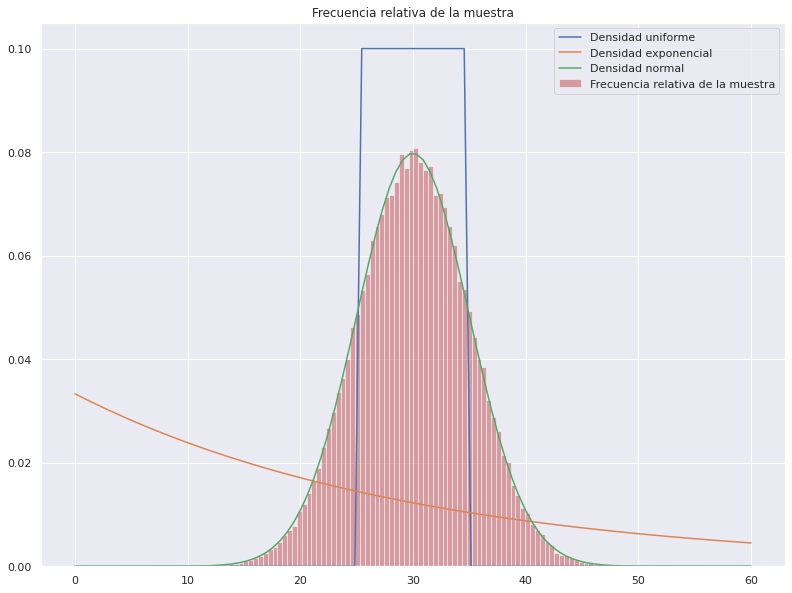

In [26]:
fig, ax = plt.subplots(figsize=[13.33,10])

x = np.linspace(0, 60, 100)

# Densidad uniforme
fu = st.uniform(loc=25, scale=10)
ax.plot(x,fu.pdf(x), label="Densidad uniforme")

# Densidad exponencial
fe = st.expon(scale=30)
ax.plot(x, fe.pdf(x), label="Densidad exponencial")

# Densidad normal
fn = st.norm(loc=30, scale=5)
ax.plot(x, fn.pdf(x), label="Densidad normal")

ax.hist(numeros_random, 100, density=True, alpha=0.5, label="Frecuencia relativa de la muestra")
ax.legend(loc="best")

plt.title("Frecuencia relativa de la muestra")
plt.show()

En la figura se ve claramente que el histograma coincide casi a la perfecci√≥n con la funci√≥n de densidad de la normal. Por esta raz√≥n conclu√≠mos que la muestra fue generada con una distribuci√≥n normal de media 30 y desv√≠o 5.